<a href="https://colab.research.google.com/github/d9249/Lotto/blob/main/2021/09/11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/Lotto

[Errno 2] No such file or directory: 'drive/MyDrive/Lotto'
/content


In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

main_url = "https://www.dhlottery.co.kr/gameResult.do?method=byWin"
basic_url = "https://www.dhlottery.co.kr/gameResult.do?method=byWin&drwNo="

def GetLast():
    resp = requests.get(main_url)
    soup = BeautifulSoup(resp.text, "lxml")
    result = str(soup.find("meta", {"id" : "desc", "name" : "description"})['content']) # meta
    s_idx = result.find(" ")
    e_idx = result.find("회")
    return int(result[s_idx + 1 : e_idx])

def Crawler(s_count, e_count, fp):
    for i in range(s_count , e_count + 1):
        crawler_url = basic_url + str(i)
        resp = requests.get(crawler_url)
        soup = BeautifulSoup(resp.text, "html.parser")

        text = soup.text

        s_idx = text.find(" 당첨결과")
        s_idx = text.find("당첨번호", s_idx) + 4
        e_idx = text.find("보너스", s_idx)
        numbers = text[s_idx:e_idx].strip().split()

        s_idx = e_idx + 3
        e_idx = s_idx + 3
        bonus = text[s_idx:e_idx].strip()

        s_idx = text.find("1등", e_idx) + 2
        e_idx = text.find("원", s_idx) + 1
        e_idx = text.find("원", e_idx)
        money1 = text[s_idx:e_idx].strip().replace(',','').split()[2]

        s_idx = text.find("2등", e_idx) + 2
        e_idx = text.find("원", s_idx) + 1
        e_idx = text.find("원", e_idx)
        money2 = text[s_idx:e_idx].strip().replace(',','').split()[2]

        s_idx = text.find("3등", e_idx) + 2
        e_idx = text.find("원", s_idx) + 1
        e_idx = text.find("원", e_idx)
        money3 = text[s_idx:e_idx].strip().replace(',','').split()[2]

        s_idx = text.find("4등", e_idx) + 2
        e_idx = text.find("원", s_idx) + 1
        e_idx = text.find("원", e_idx)
        money4 = text[s_idx:e_idx].strip().replace(',','').split()[2]

        s_idx = text.find("5등", e_idx) + 2
        e_idx = text.find("원", s_idx) + 1
        e_idx = text.find("원", e_idx)
        money5 = text[s_idx:e_idx].strip().replace(',','').split()[2]

        line = str(i) + ',' + numbers[0] + ',' + numbers[1] + ',' + numbers[2] + ',' + numbers[3] + ',' + numbers[4] + ',' + numbers[5] + ',' + bonus + ',' + money1 + ',' + money2 + ',' + money3 + ',' + money4 + ',' + money5
        print(line)
        line += '\n'
        fp.write(line)

last = GetLast()

fp = open('lotto.csv', 'w')
Crawler(1, last, fp)
fp.close()

1,10,23,29,33,37,40,16,0,143934100,5140500,113400,10000
2,9,13,21,25,32,42,2,2002006800,94866800,1842000,100800,10000
3,11,16,19,21,27,31,30,2000000000,0,1174100,54900,10000
4,14,27,30,31,40,42,2,0,211191200,7282400,152100,10000
5,16,24,29,40,41,42,3,0,0,6033800,166500,10000
6,14,15,26,27,40,42,34,6574451700,196297600,4267300,87600,10000
7,2,9,16,25,26,40,42,0,48165000,1605500,65500,10000
8,8,19,25,34,37,39,9,0,131555000,2268100,110500,10000
9,2,4,16,17,36,39,14,0,769456500,8743800,260000,10000
10,9,25,30,33,41,44,6,6430437900,40813400,856400,27300,10000
11,1,7,36,37,41,42,14,4780152300,362132700,9307100,206800,10000
12,2,11,21,25,39,45,44,1348845700,99914400,1417500,70200,10000
13,22,23,25,37,38,42,26,0,433309300,5777400,175600,10000
14,2,6,12,31,33,40,15,9375048300,130363400,2568700,93900,10000
15,3,4,16,30,31,37,13,17014245000,177231700,5571100,144600,10000
16,6,7,24,37,38,40,33,4377146100,243174700,3385200,123500,10000
17,3,4,9,17,32,37,1,5349491200,297193900,2342100,86700,10000
18

In [4]:
import numpy as np

dataset = np.loadtxt("./lotto.csv", delimiter=",")

In [5]:
def numbers2ohbin(numbers):

    ohbin = np.zeros(45)
    for i in range(6):
        ohbin[int(numbers[i])-1] = 1
    
    return ohbin

In [6]:
#dataset = dataset[:-1]

total_count = len(dataset)

print('total_count {0}'.format(total_count))

numbers = dataset[:, 1:7]
samples = list(map(numbers2ohbin, numbers))

x_train = samples[0:total_count-1]
y_train = samples[1:total_count]


'''

x_val = x_train
y_val = y_train

x_test = x_train
x_test = y_train


x_train = samples[0:700]
y_train = samples[1:701]
x_val = samples[700:800]
y_val = samples[701:801]
x_test = samples[800:total_count-1]
y_test = samples[801:total_count]
'''

total_count 979


'\n\nx_val = x_train\ny_val = y_train\n\nx_test = x_train\nx_test = y_train\n\n\nx_train = samples[0:700]\ny_train = samples[1:701]\nx_val = samples[700:800]\ny_val = samples[701:801]\nx_test = samples[800:total_count-1]\ny_test = samples[801:total_count]\n'

In [7]:
from __future__ import absolute_import, division, print_function, unicode_literals
!pip install tensorflow-gpu==2.0.0-rc1

     |████████████████████████████████| 380.5 MB 9.4 kB/s 
     |████████████████████████████████| 501 kB 38.5 MB/s 
     |████████████████████████████████| 4.3 MB 48.7 MB/s 
     |████████████████████████████████| 50 kB 6.8 MB/s 


In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

model = keras.Sequential([
    keras.layers.LSTM(128, batch_input_shape=(1, 1, 45), return_sequences=False, stateful=True),
    keras.layers.Dense(45, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
print('Train...')

train_loss = []
train_acc = []
val_loss = []
val_acc = []

for epoch in range(100):

    mean_train_loss = []
    mean_train_acc = []
    
    model.reset_states()

    for i in range(len(x_train)):
        
        xs = x_train[i].reshape(1, 1, 45)
        ys = y_train[i].reshape(1, 45)
        
        loss, acc = model.train_on_batch(xs, ys)

        mean_train_loss.append(loss)
        mean_train_acc.append(acc)

    train_loss.append(np.mean(mean_train_loss))
    train_acc.append(np.mean(mean_train_acc))

    '''
    mean_val_loss = []
    mean_val_acc = []

    for i in range(len(x_val)):

        xs = x_val[i].reshape(1, 1, 45)
        ys = y_val[i].reshape(1, 45)
        
        loss, acc = model.test_on_batch(xs, ys)
        
        mean_val_loss.append(loss)
        mean_val_acc.append(acc)

    val_loss.append(np.mean(mean_val_loss))
    val_acc.append(np.mean(mean_val_acc))

    print('epoch {0:2d} train acc {1:0.3f} loss {2:0.3f} val acc {3:0.3f} loss {4:0.3f}'.format(epoch, np.mean(mean_train_acc), np.mean(mean_train_loss), np.mean(mean_val_acc), np.mean(mean_val_loss)))
    '''

    print('epoch {0:2d} train acc {1:0.3f} loss {2:0.3f}'.format(epoch, np.mean(mean_train_acc), np.mean(mean_train_loss)))

Train...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
epoch  0 train acc 0.863 loss 0.406
epoch  1 train acc 0.867 loss 0.396
epoch  2 train acc 0.867 loss 0.394
epoch  3 train acc 0.867 loss 0.392
epoch  4 train acc 0.867 loss 0.389
epoch  5 train acc 0.867 loss 0.385
epoch  6 train acc 0.867 loss 0.381
epoch  7 train acc 0.867 loss 0.376
epoch  8 train acc 0.867 loss 0.371
epoch  9 train acc 0.867 loss 0.366
epoch 10 train acc 0.867 loss 0.360
epoch 11 train acc 0.868 loss 0.354
epoch 12 train acc 0.868 loss 0.347
epoch 13 train acc 0.869 loss 0.340
epoch 14 train acc 0.870 loss 0.331
epoch 15 train acc 0.872 loss 0.323
epoch 16 train acc 0.875 loss 0.314
epoch 17 train acc 0.878 loss 0.304
epoch 18 train acc 0.882 loss 0.294
epoch 19 train acc 0.884 loss 0.284
epoch 20 train acc 0.888 loss 0.274
epoch 21 train acc 0.892 loss 0.264
epoch 22 train acc 0.896 loss 0.253
epoch 23 train acc 0.900 loss 0.244
epoch 24 train acc 0.904 loss 0.2

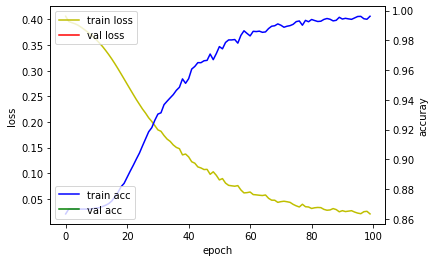

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(train_loss, 'y', label='train loss')
loss_ax.plot(val_loss, 'r', label='val loss')

acc_ax.plot(train_acc, 'b', label='train acc')
acc_ax.plot(val_acc, 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [11]:
model.save('model.h5')

In [12]:
import numpy as np
from tensorflow.keras import models

#model = models.load_model('model.h5')

In [13]:
import numpy as np
from tensorflow.keras import models

mean_prize = [ np.mean(dataset[87:, 8]),
           np.mean(dataset[87:, 9]),
           np.mean(dataset[87:, 10]),
           np.mean(dataset[87:, 11]),
           np.mean(dataset[87:, 12])]

print(mean_prize)           

[2431113580.336323, 57190048.498878926, 1450694.7230941704, 52770.15470852018, 5000.0]


In [14]:
def calc_reward(true_numbers, true_bonus, pred_numbers):

    count = 0

    for ps in pred_numbers:
        if ps in true_numbers:
            count += 1

    if count == 6:
        return mean_prize[0], count
    elif count == 5 and true_bonus in pred_numbers:
        return mean_prize[1], count
    elif count == 5:
        return mean_prize[2], count
    elif count == 4:
        return mean_prize[3], count
    elif count == 3:
        return mean_prize[4], count

    return 0, count

In [15]:
def gen_numbers_from_probability(nums_prob):

    ball_box = []

    for n in range(45):
        ball_count = int(nums_prob[n] * 100 + 1)
        ball = np.full((ball_count), n+1) #1부터 시작
        ball_box += list(ball)

    selected_balls = []

    while True:
        
        if len(selected_balls) == 6:
            break
        
        ball_index = np.random.randint(len(ball_box), size=1)[0]
        ball = ball_box[ball_index]

        #print('{0} {1} {2}'.format(len(ball_box), ball_index, ball))

        if ball not in selected_balls:
            selected_balls.append(ball)

    return selected_balls

In [16]:
model.reset_states()

gi = 1

rewards = []

for i in range(len(x_train)):
    xs = x_train[i].reshape(1, 1, 45)
    ys_pred = model.predict_on_batch(xs)
    
    sum_rewards = 0

    print('No.{0:3d} True Numbers {1}'.format(gi+1, dataset[gi,1:7]))
    
    for n in range(10):
        numbers = gen_numbers_from_probability(ys_pred[0])
        reward, count = calc_reward(dataset[gi,1:7], dataset[gi,7], numbers)
        
        print('{0:2d} {1:15,d} {2:4d} {3}'.format(n, int(reward), count, numbers))

        sum_rewards += reward
    
    print('Total Reward: {0:15,d}'.format(int(sum_rewards)))

    rewards.append(sum_rewards)
    gi += 1
'''
for i in range(len(x_val)):
    xs = x_val[i].reshape(1, 1, 45)
    ys_pred = model.predict_on_batch(xs)

    sum_rewards = 0
    for n in range(10):
        numbers = gen_numbers_from_probability(ys_pred[0])
        sum_rewards += calc_reward(dataset[gi,1:7], dataset[gi,7], numbers)

    print('{0:4d} {1} {2} {3:.1f}'.format(gi, dataset[gi,1:7], numbers, sum_rewards))
    rewards.append(sum_rewards)
    gi += 1

for i in range(len(x_test)):
    xs = x_test[i].reshape(1, 1, 45)
    ys_pred = model.predict_on_batch(xs)

    sum_rewards = 0

    for n in range(10):
        numbers = gen_numbers_from_probability(ys_pred[0])
        sum_rewards += calc_reward(dataset[gi,1:7], dataset[gi,7], numbers)

    print('{0:4d} {1} {2} {3:.1f}'.format(gi, dataset[gi,1:7], numbers, sum_rewards))
    rewards.append(sum_rewards)
    gi += 1
'''    

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 3       1,450,694    5 [10, 17, 31, 32, 16, 44]
 4       1,450,694    5 [5, 16, 39, 31, 32, 10]
 5       1,450,694    5 [10, 32, 16, 5, 17, 44]
 6   2,431,113,580    6 [31, 5, 32, 17, 10, 16]
 7   2,431,113,580    6 [32, 10, 5, 16, 17, 31]
 8       1,450,694    5 [17, 10, 16, 32, 5, 14]
 9           5,000    3 [10, 32, 23, 31, 35, 29]
Total Reward:   7,302,049,909
No.564 True Numbers [14. 19. 25. 26. 27. 34.]
 0       1,450,694    5 [14, 26, 25, 19, 27, 6]
 1   2,431,113,580    6 [14, 34, 19, 27, 25, 26]
 2       1,450,694    5 [19, 26, 14, 34, 6, 27]
 3       1,450,694    5 [34, 19, 27, 26, 9, 25]
 4   2,431,113,580    6 [34, 25, 19, 26, 14, 27]
 5          52,770    4 [27, 19, 29, 34, 45, 26]
 6       1,450,694    5 [14, 34, 15, 26, 25, 19]
 7       1,450,694    5 [29, 25, 14, 27, 19, 26]
 8       1,450,694    5 [27, 44, 25, 26, 19, 14]
 9   2,431,113,580    6 [25, 14, 27, 19, 26, 34]
Total Reward:   7,302,097,679
No.565 True Numbers [ 4. 10. 18. 

"\nfor i in range(len(x_val)):\n    xs = x_val[i].reshape(1, 1, 45)\n    ys_pred = model.predict_on_batch(xs)\n\n    sum_rewards = 0\n    for n in range(10):\n        numbers = gen_numbers_from_probability(ys_pred[0])\n        sum_rewards += calc_reward(dataset[gi,1:7], dataset[gi,7], numbers)\n\n    print('{0:4d} {1} {2} {3:.1f}'.format(gi, dataset[gi,1:7], numbers, sum_rewards))\n    rewards.append(sum_rewards)\n    gi += 1\n\nfor i in range(len(x_test)):\n    xs = x_test[i].reshape(1, 1, 45)\n    ys_pred = model.predict_on_batch(xs)\n\n    sum_rewards = 0\n\n    for n in range(10):\n        numbers = gen_numbers_from_probability(ys_pred[0])\n        sum_rewards += calc_reward(dataset[gi,1:7], dataset[gi,7], numbers)\n\n    print('{0:4d} {1} {2} {3:.1f}'.format(gi, dataset[gi,1:7], numbers, sum_rewards))\n    rewards.append(sum_rewards)\n    gi += 1\n"

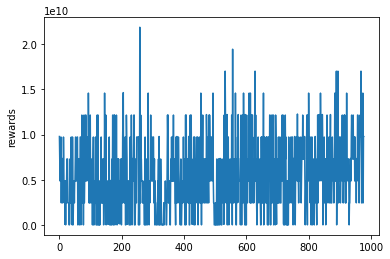

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(rewards)
plt.ylabel('rewards')
plt.show()

In [18]:
print('receive numbers')

xs = samples[-1].reshape(1, 1, 45)

ys_pred = model.predict_on_batch(xs)

list_numbers = []

for n in range(10):
    numbers = gen_numbers_from_probability(ys_pred[0])
    print('{0} : {1}'.format(n, numbers))
    list_numbers.append(numbers)

receive numbers
0 : [20, 43, 15, 10, 29, 40]
1 : [40, 13, 31, 21, 15, 42]
2 : [20, 30, 33, 43, 13, 21]
3 : [43, 40, 13, 30, 15, 20]
4 : [30, 33, 43, 13, 31, 15]
5 : [15, 13, 5, 30, 40, 41]
6 : [21, 43, 13, 15, 29, 30]
7 : [13, 43, 42, 40, 20, 21]
8 : [31, 43, 30, 13, 15, 40]
9 : [13, 21, 30, 15, 27, 40]


In [19]:
print(list_numbers[0])
print(list_numbers[1])
print(list_numbers[2])
print(list_numbers[3])
print(list_numbers[4])
print(list_numbers[5])
print(list_numbers[6])
print(list_numbers[7])
print(list_numbers[8])
print(list_numbers[9])

[20, 43, 15, 10, 29, 40]
[40, 13, 31, 21, 15, 42]
[20, 30, 33, 43, 13, 21]
[43, 40, 13, 30, 15, 20]
[30, 33, 43, 13, 31, 15]
[15, 13, 5, 30, 40, 41]
[21, 43, 13, 15, 29, 30]
[13, 43, 42, 40, 20, 21]
[31, 43, 30, 13, 15, 40]
[13, 21, 30, 15, 27, 40]


In [20]:
print('rewards check')
total_rewards = 0

for n in range(len(list_numbers)):
    reward, count = calc_reward([19,32,37,40,41,43], [45], list_numbers[n])
    print('{0} {1:15,d}'.format(count, int(reward)))
    total_rewards += reward

print('Total {0:15,d}'.format(int(total_rewards)))

rewards check
2               0
1               0
1               0
2               0
1               0
2               0
1               0
2               0
2               0
1               0
Total               0
